<a href="https://colab.research.google.com/github/gultandon/Out-of-Hospital-Cardiac-Arrest-Detection-System/blob/main/OHCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DEPENDENCIES**

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.layers import GRU

**LOAD DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    # plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    # plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

**ABNORMAL**

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# ptbdb_abnormal.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df = pd.read_csv('/content/gdrive/MyDrive/edu/ptbdb_abnormal.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'ptbdb_abnormal.csv'
nRow, nCol = df.shape
print(f"   rows: {nRow}")
print(f"columns: {nCol}")

   rows: 1000
columns: 188


In [ ]:
df.head(5)

,9.322328567504882812e-01,8.696785569190979004e-01,8.861859440803527832e-01,9.296264052391052246e-01,9.087749719619750977e-01,9.339704513549804688e-01,8.010425567626953125e-01,7.497828006744384766e-01,6.872285008430480957e-01,6.350998878479003906e-01,...,0.000000000000000000e+00.117,0.000000000000000000e+00.118,0.000000000000000000e+00.119,0.000000000000000000e+00.120,0.000000000000000000e+00.121,0.000000000000000000e+00.122,0.000000000000000000e+00.123,0.000000000000000000e+00.124,0.000000000000000000e+00.125,1.000000000000000000e+00.1
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<ipython-input-34-0bb590786756>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


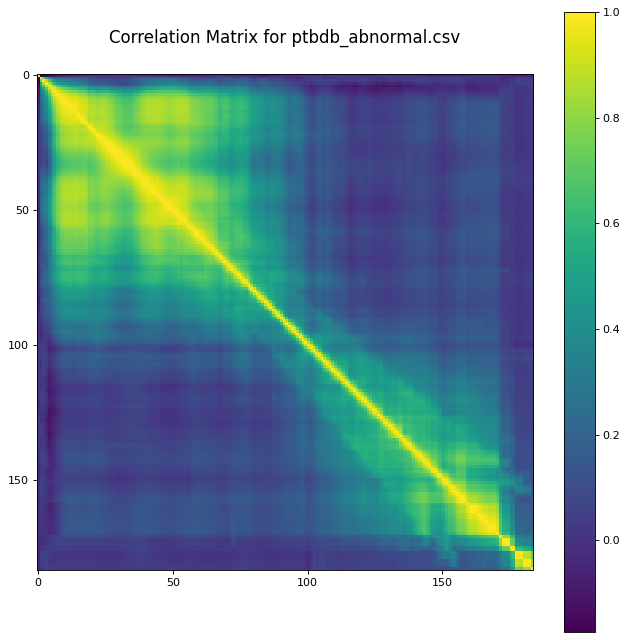

In [ ]:
plotCorrelationMatrix(df, 10)

**NORMAL**

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# ptbdb_abnormal.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df = pd.read_csv('/content/gdrive/MyDrive/edu/ptbdb_normal.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'ptbdb_normal.csv'
nRow, nCol = df.shape
print(f"   rows: {nRow}")
print(f"columns: {nCol}")

   rows: 1000
columns: 188


In [ ]:
df.head(5)

,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<ipython-input-34-0bb590786756>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


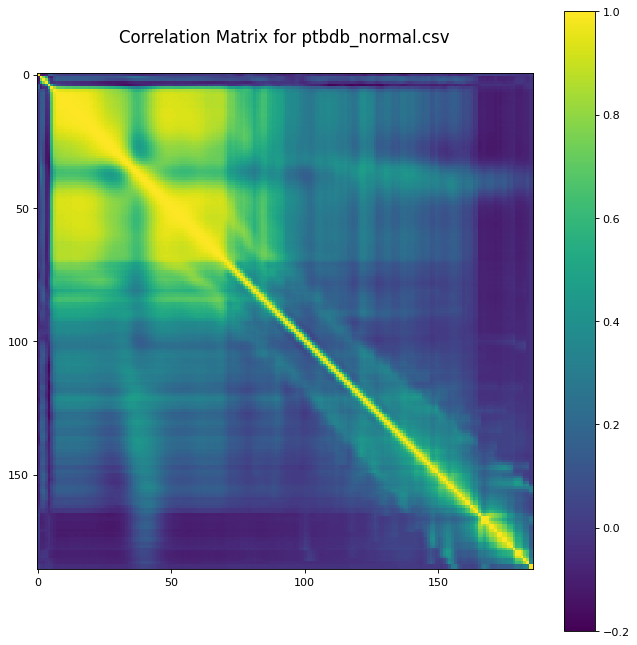

In [ ]:
plotCorrelationMatrix(df, 10)

**GRU**

In [ ]:
dfs = [pd.read_csv(f'/content/gdrive/MyDrive/edu/ptbdb_{x}.csv') for x in ['normal', 'abnormal']]

In [ ]:
for df in dfs:
    df.columns = list(range(len(df.columns)))

In [ ]:
data = pd.concat(dfs, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

data = data.rename({187: 'Label'}, axis=1)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,Label
0,1.000000,0.887073,0.774146,0.713224,0.682021,0.699851,0.595840,0.552749,0.469539,0.481426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.684376,0.395907,0.288863,0.262102,0.231405,0.234160,0.218811,0.207399,0.212121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.645543,0.270195,0.089833,0.038997,0.064067,0.045265,0.062674,0.059192,0.057799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.995881,0.993821,0.959835,0.872297,0.542739,0.054583,0.000000,0.098867,0.156540,0.302781,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.996020,0.323383,0.109453,0.035821,0.264677,0.342289,0.367164,0.402985,0.401990,0.420896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14545,1.000000,0.979786,0.621879,0.146849,0.000000,0.266944,0.356718,0.421522,0.450059,0.457788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14546,1.000000,0.648015,0.424677,0.315160,0.223816,0.156384,0.156863,0.122908,0.093735,0.122908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14547,0.931217,1.000000,0.465201,0.150183,0.035409,0.033374,0.049247,0.070818,0.078958,0.087505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14548,1.000000,0.588291,0.120570,0.056962,0.136076,0.181646,0.182595,0.185759,0.178481,0.186076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = data['Label'].copy()
X = data.drop('Label', axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
8540,1.000000,0.834705,0.358711,0.163923,0.096708,0.100137,0.137860,0.131001,0.131001,0.147462,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
10734,1.000000,0.783220,0.479365,0.206803,0.010884,0.078912,0.107937,0.113832,0.116553,0.113832,...,0.063492,0.070748,0.094785,0.142404,0.149206,0.155102,0.0,0.0,0.0,0.0
13652,1.000000,0.789198,0.247764,0.000000,0.039662,0.105148,0.115274,0.105654,0.109030,0.108017,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5014,1.000000,0.783092,0.592754,0.418357,0.347826,0.314976,0.289372,0.275362,0.267150,0.276812,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
11630,0.990495,0.670835,0.302151,0.000000,0.068534,0.074537,0.141571,0.253127,0.309155,0.310155,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1.000000,0.668866,0.334133,0.069586,0.106179,0.244151,0.262148,0.238152,0.240552,0.246551,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5192,0.970892,0.406573,0.051643,0.065728,0.184038,0.205634,0.238498,0.227230,0.234742,0.271362,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
12172,1.000000,0.770696,0.600526,0.543364,0.500657,0.496058,0.500657,0.523653,0.519054,0.520368,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
235,1.000000,0.814031,0.646993,0.079065,0.063474,0.122494,0.208241,0.231626,0.263920,0.279510,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [ ]:
y_train

8540     0.0
10734    0.0
13652    0.0
5014     1.0
11630    1.0
        ... 
905      1.0
5192     1.0
12172    1.0
235      1.0
13349    1.0
Name: Label, Length: 10185, dtype: float64

In [ ]:
X_train.shape

(10185, 187)

In [ ]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand = tf.expand_dims(inputs, axis=2)
gru = tf.keras.layers.GRU(256, return_sequences=True)(expand)
flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(flatten)


model = tf.keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 187)]             0         
                                                                 
 tf.expand_dims_1 (TFOpLambd  (None, 187, 1)           0         
 a)                                                              
                                                                 
 gru_1 (GRU)                 (None, 187, 256)          198912    
                                                                 
 flatten_1 (Flatten)         (None, 47872)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 47873     
                                                                 
Total params: 246,785
Trainable params: 246,785
Non-trainable params: 0
_____________________________________________________

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
255/255 [==============================] - 7s 19ms/step - loss: 0.4629 - accuracy: 0.7658 - auc: 0.8103 - val_loss: 0.4259 - val_accuracy: 0.7801 - val_auc: 0.8395
Epoch 2/100
255/255 [==============================] - 3s 12ms/step - loss: 0.4176 - accuracy: 0.8009 - auc: 0.8547 - val_loss: 0.3890 - val_accuracy: 0.8164 - val_auc: 0.8742
Epoch 3/100
255/255 [==============================] - 3s 11ms/step - loss: 0.3726 - accuracy: 0.8298 - auc: 0.8878 - val_loss: 0.3907 - val_accuracy: 0.8105 - val_auc: 0.8817
Epoch 4/100
255/255 [==============================] - 3s 11ms/step - loss: 0.3417 - accuracy: 0.8481 - auc: 0.9070 - val_loss: 0.3443 - val_accuracy: 0.8287 - val_auc: 0.9152
Epoch 5/100
255/255 [==============================] - 4s 15ms/step - loss: 0.3132 - accuracy: 0.8643 - auc: 0.9236 - val_loss: 0.3358 - val_accuracy: 0.8463 - val_auc: 0.9196
Epoch 6/100
255/255 [==============================] - 3s 13ms/step - loss: 0.2851 - accuracy: 0.8784 - auc: 0.9376 - va

In [ ]:
results = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
print("Test Accuracy: {:.2f}%".format(results[1] * 100))
print("     Test AUC: {:.4f}".format(results[2]))

Test Accuracy: 97.92%
     Test AUC: 0.9936
